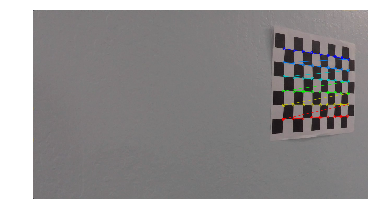

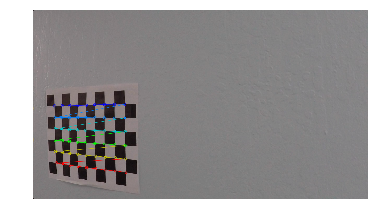

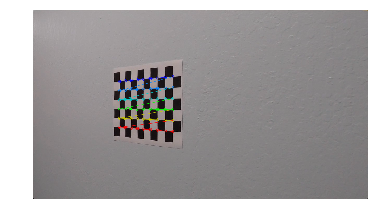

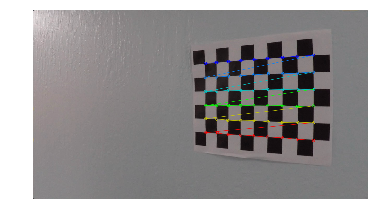

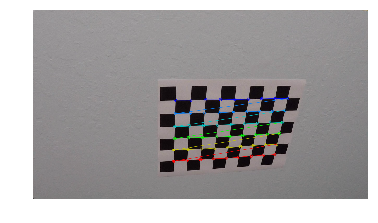

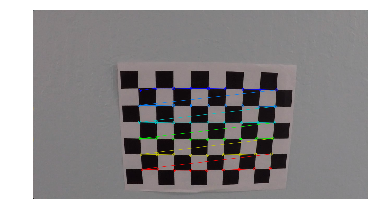

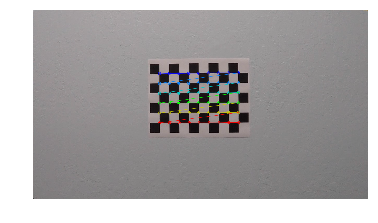

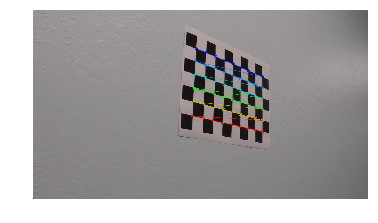

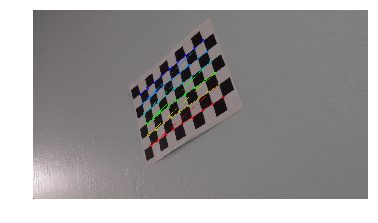

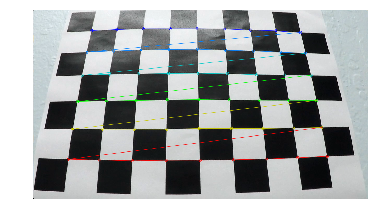

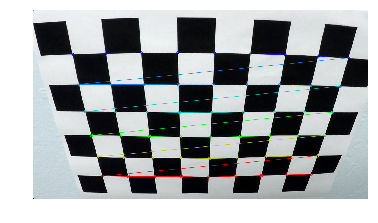

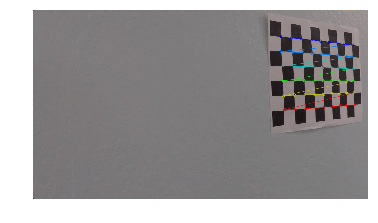

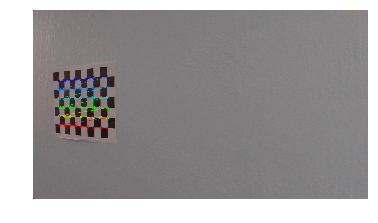

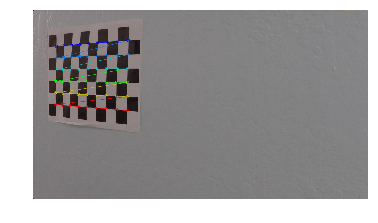

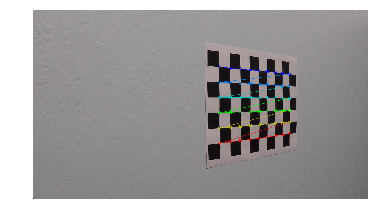

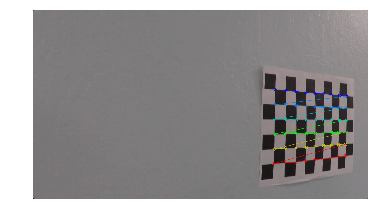

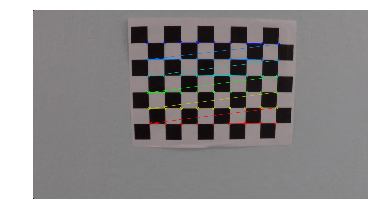

In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

plt.rcParams.update({'figure.max_open_warning': 0})

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('../camera_cal/calibration*.jpg')
#image = mpimg.imread('../camera_cal/calibration1.jpg')
#plt.imshow(image)
# Step through the list and search for chessboard corners
for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6),None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (9,6), corners, ret)
        plt.figure(figsize=(10,10))
        fig = plt.figure()
        plt.imshow(img)
        plt.axis('off')

In [2]:
def gaussian_blur(img, kernel_size):
    """Applies a Gaussian Noise kernel"""
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

In [3]:
def cal_undistort(img, objpoints, imgpoints):
    # Use cv2.calibrateCamera() and cv2.undistort()
    #undist = np.copy(img)  # Delete this line
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img.shape[1::-1], None, None)
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    return undist

(-0.5, 1279.5, 719.5, -0.5)

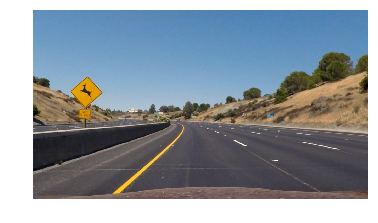

In [4]:
image = mpimg.imread('../test_images/test2.jpg')
undistorted = cal_undistort(image, objpoints, imgpoints)
plt.imshow(undistorted)
plt.axis('off')

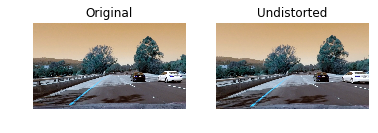

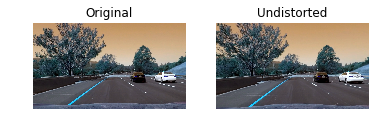

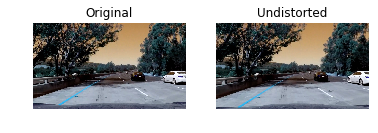

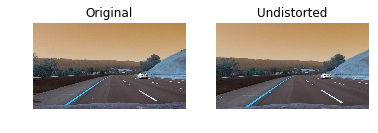

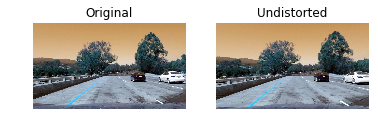

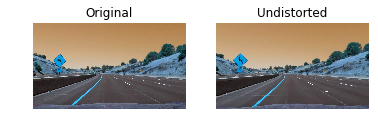

In [5]:
test_images = glob.glob('../test_images/test*.jpg')
for idx, fname in enumerate(test_images):
    test_img = cv2.imread(fname)
    undistorted = cal_undistort(test_img, objpoints, imgpoints)
    plt.figure(idx)
    plt.subplot(121)
    plt.imshow(test_img)
    plt.title("Original")
    plt.axis('off')
    plt.subplot(122)
    plt.imshow(undistorted)
    plt.title("Undistorted")
    plt.axis('off')

In [6]:
def birds_eye_view(org, src, dst):
    img_size = (org.shape[1], org.shape[0])
    # Given src and dst points, calculate the perspective transform matrix
    M = cv2.getPerspectiveTransform(src, dst)
    # Warp the image using OpenCV warpPerspective()
    warped = cv2.warpPerspective(org, M, img_size)
    return warped, M

(-0.5, 1279.5, 719.5, -0.5)

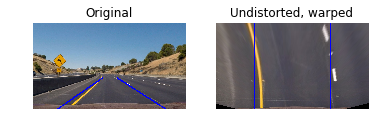

In [7]:
image = mpimg.imread('../test_images/test2.jpg')
source = np.float32([[580, 460], [205, 720], [1110, 720], [705, 460]])
destination = np.float32([[320, 0], [320, 720], [960, 720], [960, 0]])
undistorted = cal_undistort(image, objpoints, imgpoints)
result_bev, M = birds_eye_view(undistorted, source, destination)
plt_image = np.copy(image)
plt_bev = np.copy(result_bev)
cv2.line(plt_image,tuple(source[0]),tuple(source[1]),(0,0,255),10)
cv2.line(plt_image,tuple(source[2]),tuple(source[3]),(0,0,255),10)
cv2.line(plt_bev,tuple(destination[0]),tuple(destination[1]),(0,0,255),10)
cv2.line(plt_bev,tuple(destination[2]),tuple(destination[3]),(0,0,255),10)
plt.figure(1)
plt.subplot(121)
plt.imshow(plt_image)
plt.title("Original")
plt.axis('off')
plt.subplot(122)
plt.imshow(plt_bev)
plt.title("Undistorted, warped")
plt.axis('off')

In [8]:
def color_filter(hsv_img, img, low, high):
    mask = cv2.inRange(hsv_img, low, high)
    res = cv2.bitwise_and(img, img, mask=mask)
    return mask, res

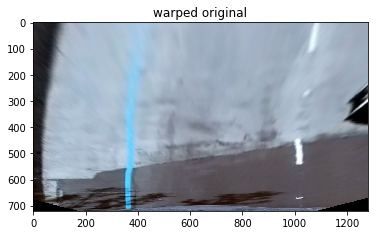

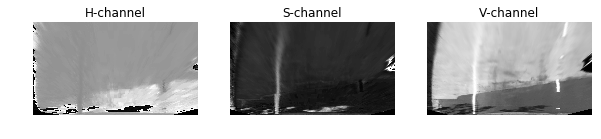

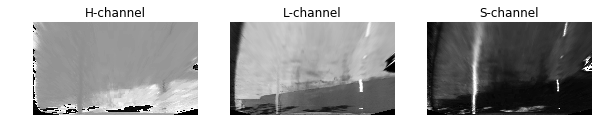

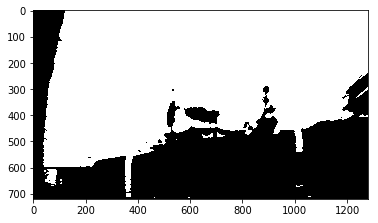

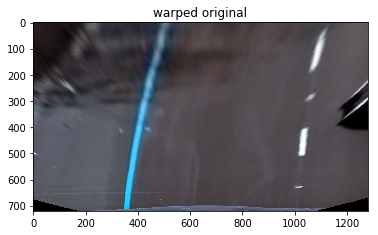

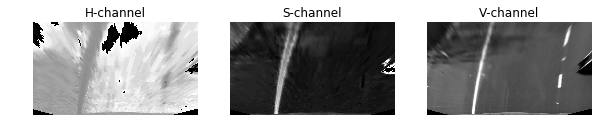

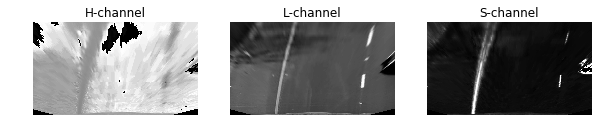

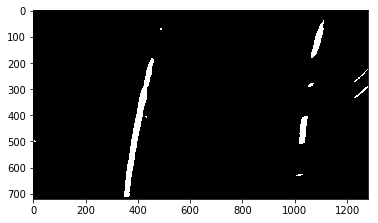

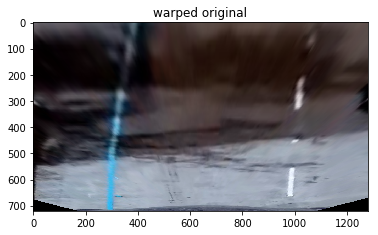

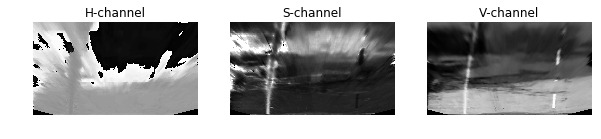

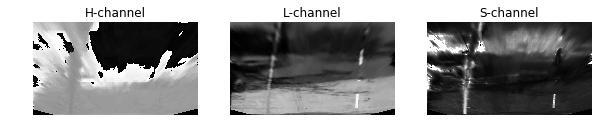

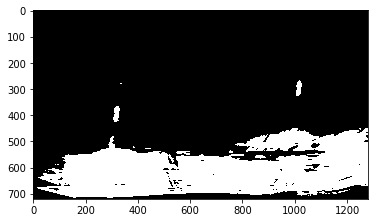

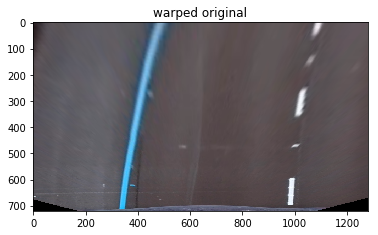

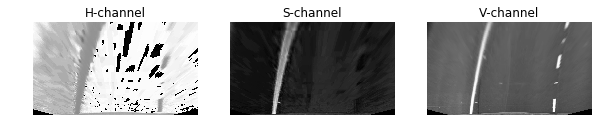

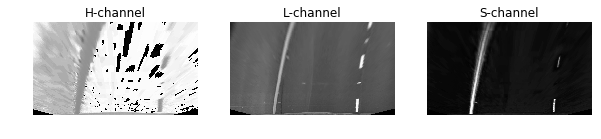

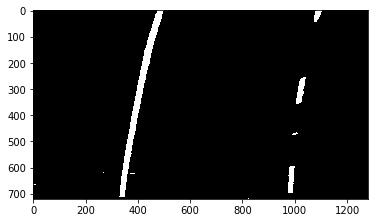

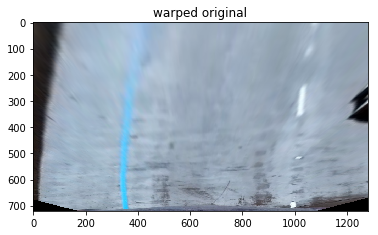

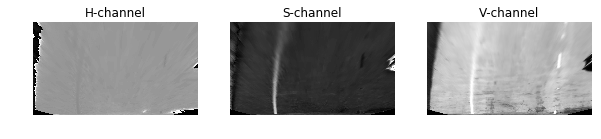

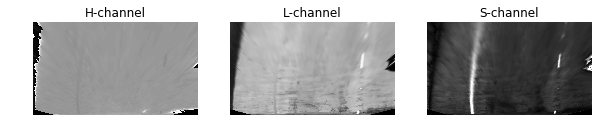

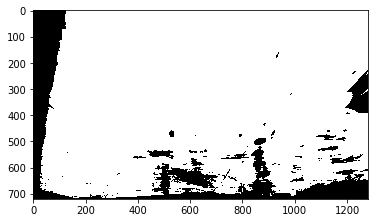

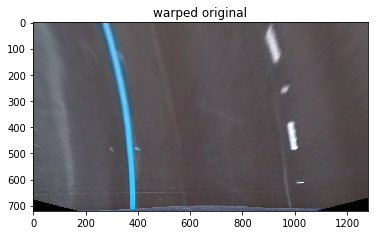

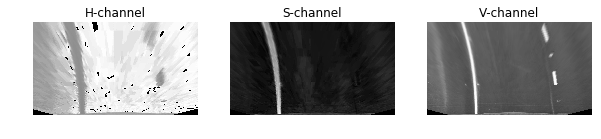

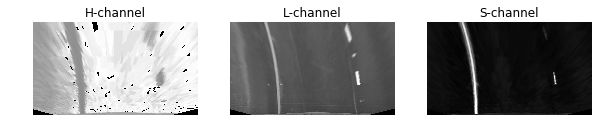

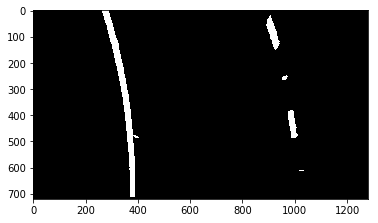

In [100]:
test_images = glob.glob('../test_images/test*.jpg')
for idx, fname in enumerate(test_images):
    test_img = cv2.imread(fname)
    undistorted = cal_undistort(test_img, objpoints, imgpoints)
    warp, M = birds_eye_view(undistorted, source, destination)
    plt.figure(idx)
    plt.imshow(warp)
    plt.title("warped original")
    hsv = cv2.cvtColor(warp,cv2.COLOR_RGB2HSV)
    hls = cv2.cvtColor(warp,cv2.COLOR_RGB2HLS)
    plt.figure(idx+10, figsize=(10,10))
    plt.subplot(131)
    plt.imshow(hsv[:,:,0], cmap='gray')
    plt.title("H-channel")
    plt.axis('off')
    plt.subplot(132)
    plt.imshow(hsv[:,:,1], cmap='gray')
    plt.title("S-channel")
    plt.axis('off')
    plt.subplot(133)
    plt.imshow(hsv[:,:,2], cmap='gray')
    plt.title("V-channel")
    plt.axis('off')

    plt.figure(idx+20, figsize=(10,10))
    plt.subplot(131)
    plt.imshow(hls[:,:,0], cmap='gray')
    plt.title("H-channel")
    plt.axis('off')
    plt.subplot(132)
    plt.imshow(hls[:,:,1], cmap='gray')
    plt.title("L-channel")
    plt.axis('off')
    plt.subplot(133)
    plt.imshow(hls[:,:,2], cmap='gray')
    plt.title("S-channel")
    plt.axis('off')

    v_thresh=(170, 255)
    s_channel = hls[:,:,2]
    v_channel = hsv[:,:,2]
    v_binary = np.zeros_like(v_channel)
    v_binary[(v_channel >= v_thresh[0]) & (v_channel <= v_thresh[1])] = 1
    color_binary = np.dstack((v_binary, v_binary, v_binary)) * 255
    plt.figure(idx+30)
    plt.imshow(color_binary)

(-0.5, 1279.5, 719.5, -0.5)

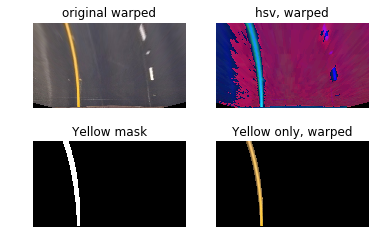

In [10]:
hsv = cv2.cvtColor(result_bev,cv2.COLOR_RGB2HSV)

yellow_low  = np.array([ 0,  100,  100])
yellow_high = np.array([ 80, 255, 255])

yellow_mask, yellow_result = color_filter(hsv, result_bev, yellow_low, yellow_high)
plt.figure(1)
plt.subplot(221)
plt.imshow(result_bev)
plt.title("original warped")
plt.axis('off')
plt.subplot(222)
plt.imshow(hsv)
plt.title("hsv, warped")
plt.axis('off')
plt.subplot(223)
plt.imshow(yellow_mask, cmap='gray')
plt.title("Yellow mask")
plt.axis('off')
plt.subplot(224)
plt.imshow(yellow_result)
plt.title("Yellow only, warped")
plt.axis('off')

(720, 1280)
(720, 1280, 3)


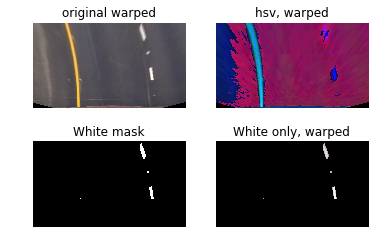

In [11]:
white_low  = np.array([ 0,   0,   160])
white_high = np.array([ 255,  80, 255])

white_mask, white_result = color_filter(hsv, result_bev, white_low, white_high)
plt.figure(1)
plt.subplot(221)
plt.imshow(result_bev)
plt.title("original warped")
plt.axis('off')
plt.subplot(222)
plt.imshow(hsv)
plt.title("hsv, warped")
plt.axis('off')
plt.subplot(223)
plt.imshow(white_mask, cmap='gray')
plt.title("White mask")
plt.axis('off')
print(white_mask.shape)
plt.subplot(224)
plt.imshow(white_result)
plt.title("White only, warped")
plt.axis('off');
print(white_result.shape)

In [12]:
def combined_color_filter(hsv, result_bev, yellow_low, yellow_high, white_low, white_high):
    yellow_mask, yellow_result = color_filter(hsv, result_bev, yellow_low, yellow_high)
    white_mask, white_result = color_filter(hsv, result_bev, white_low, white_high)
    lanes_mask = cv2.bitwise_or(yellow_mask, white_mask)
    lanes_color = cv2.bitwise_or(yellow_mask, white_mask)
    return lanes_mask

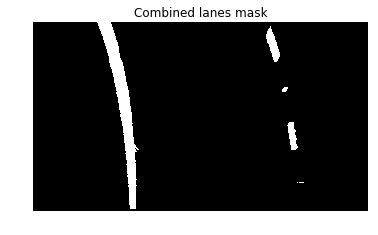

In [13]:
lanes_mask = combined_color_filter(hsv, result_bev, yellow_low, yellow_high, white_low, white_high)
plt.figure()
plt.imshow(lanes_mask, cmap='gray')
plt.title("Combined lanes mask")
plt.axis('off');

In [14]:
def abs_sobel_thresh(gray, orient='x', sobel_kernel=3, thresh=(0, 255)):
    # Calculate directional gradient
    # Apply threshold
    #gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    if orient == 'x':
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 1, 0))
    if orient == 'y':
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 0, 1))
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    grad_binary = np.zeros_like(scaled_sobel)
    grad_binary[(scaled_sobel >= thresh[0]) & (scaled_sobel <= thresh[1])] = 1
    return grad_binary

def mag_thresh(gray, sobel_kernel=3, mag_thresh=(0, 255)):
    # Calculate gradient magnitude
    # Apply threshold
    #gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Take both Sobel x and y gradients
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # Calculate the gradient magnitude
    gradmag = np.sqrt(sobelx**2 + sobely**2)
    # Rescale to 8 bit
    scale_factor = np.max(gradmag)/255 
    gradmag = (gradmag/scale_factor).astype(np.uint8) 
    # Create a binary image of ones where threshold is met, zeros otherwise
    mag_binary = np.zeros_like(gradmag)
    mag_binary[(gradmag >= mag_thresh[0]) & (gradmag <= mag_thresh[1])] = 1
    return mag_binary

def dir_threshold(gray, sobel_kernel=3, thresh=(0, np.pi/2)):
    # Calculate gradient direction
    # Apply threshold
    #gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Calculate the x and y gradients
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # Take the absolute value of the gradient direction, 
    # apply a threshold, and create a binary image result
    absgraddir = np.arctan2(np.absolute(sobely), np.absolute(sobelx))
    dir_binary =  np.zeros_like(absgraddir)
    dir_binary[(absgraddir >= thresh[0]) & (absgraddir <= thresh[1])] = 1
    return dir_binary

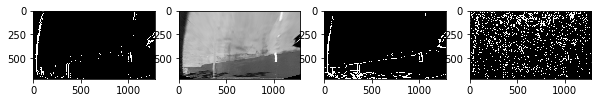

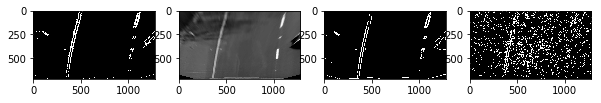

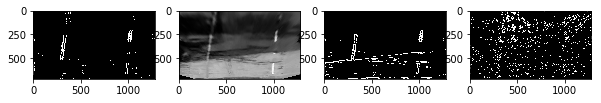

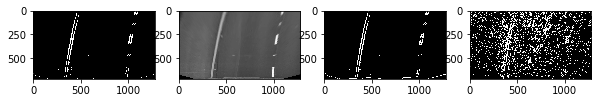

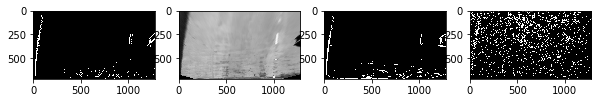

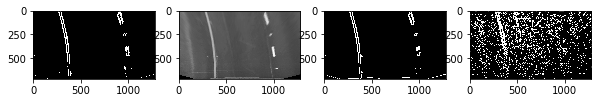

In [87]:
test_images = glob.glob('../test_images/test*.jpg')
for idx, fname in enumerate(test_images):
    test_img = cv2.imread(fname)
    undistorted = cal_undistort(test_img, objpoints, imgpoints)
    warp, M = birds_eye_view(undistorted, source, destination)
    gray = cv2.cvtColor(gaussian_blur(warp, 1), cv2.COLOR_RGB2GRAY)


    # Apply each of the thresholding functions
    gradx = abs_sobel_thresh(gray, orient='x', sobel_kernel=15, thresh=(20, 100))
    grady = abs_sobel_thresh(gray, orient='y', sobel_kernel=15, thresh=(20, 100))
    mag_binary = mag_thresh(gray, sobel_kernel=15, mag_thresh=(30, 100))
    dir_binary = dir_threshold(gray, sobel_kernel=15, thresh=(0.1, 0.3))

    combined_sobel = np.zeros_like(dir_binary)
    combined_sobel[((gradx == 1) & (grady == 1)) | ((mag_binary == 1) & (dir_binary == 1))] = 1
    plt.figure(figsize=(10,10))
    plt.subplot(141)
    plt.imshow(gradx, cmap='gray')
    plt.subplot(142)
    plt.imshow(gray, cmap='gray')
    plt.subplot(143)
    plt.imshow(mag_binary, cmap='gray')
    plt.subplot(144)
    plt.imshow(dir_binary, cmap='gray')

In [16]:
def combined_binary(warped):
    blur_image = gaussian_blur(warped, 5)
    gray_image = cv2.cvtColor(blur_image, cv2.COLOR_RGB2GRAY)
    hsv_image = cv2.cvtColor(blur_image,cv2.COLOR_RGB2HSV)
    hls_image = cv2.cvtColor(blur_image,cv2.COLOR_RGB2HLS)
    
    v_channel = hsv[:,:,2]
    v_binary = np.zeros_like(v_channel)
    v_binary[(v_channel >= v_thresh[0]) & (v_channel <= v_thresh[1])] = 1
    
    gradx = abs_sobel_thresh(gray, orient='x', sobel_kernel=15, thresh=(20, 100))
    # Combine the two binary thresholds
    combined_binary = np.zeros_like(v_channel)
    combined_binary[(v_binary == 1) | (gradx == 1)] = 1
    
    return combined_binary

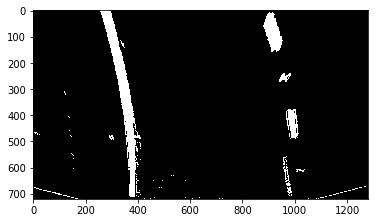

In [17]:
bin_image = combined_binary(result_bev)
color_binary = np.dstack((bin_image, bin_image, bin_image)) * 255
plt.figure()
#color_binary[:,:,2]=255
plt.imshow(color_binary)

(-0.5, 1279.5, 719.5, -0.5)

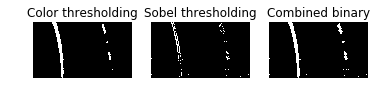

In [18]:
combined_lanes = np.zeros_like(dir_binary)
combined_lanes[((lanes_mask >= 0.5) | (combined_sobel >=0.5))] = 1
plt.figure()
plt.subplot(131)
plt.imshow(lanes_mask, cmap='gray')
plt.title("Color thresholding")
plt.axis('off')
plt.subplot(132)
plt.imshow(combined_sobel, cmap='gray')
plt.title("Sobel thresholding")
plt.axis('off')
plt.subplot(133)
plt.imshow(combined_lanes, cmap='gray')
plt.title("Combined binary")
plt.axis('off')

(720, 1280)


1

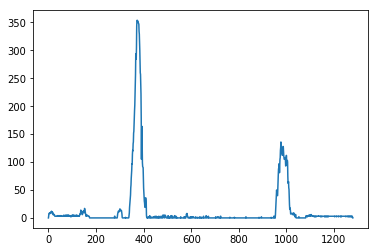

In [19]:
print(bin_image.shape)
histogram = np.sum(bin_image[bin_image.shape[0]//2:,:], axis=0)#Bottom half
plt.plot(histogram)
np.max(bin_image)

In [95]:
def find_lane_pixels(binary_warped):
    print(np.max(binary_warped), np.min(binary_warped))
    out_img = np.dstack((binary_warped, binary_warped, binary_warped)) * 255
    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    histogram = np.sum(binary_warped[binary_warped.shape[0]//2:,:], axis=0)#Bottom half
    print(histogram.shape)
    midpoint = np.int(histogram.shape[0]//2)
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint

    # HYPERPARAMETERS
    # Choose the number of sliding windows
    nwindows = 9
    # Set the width of the windows +/- margin
    margin = 100
    # Set minimum number of pixels found to recenter window
    minpix = 50

    # Set height of windows - based on nwindows above and image shape
    window_height = np.int(binary_warped.shape[0]//nwindows)
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = binary_warped.nonzero()
    #print ("nonzero", nonzero)
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Current positions to be updated later for each window in nwindows
    leftx_current = leftx_base
    rightx_current = rightx_base

    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []

    # Step through the windows one by one
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = binary_warped.shape[0] - (window+1)*window_height
        win_y_high = binary_warped.shape[0] - window*window_height
        ### TO-DO: Find the four below boundaries of the window ###
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin
        # Draw the windows on the visualization image
        cv2.rectangle(out_img,(win_xleft_low,win_y_low),
        (win_xleft_high,win_y_high),(0,255,0), 3) 
        cv2.rectangle(out_img,(win_xright_low,win_y_low),
        (win_xright_high,win_y_high),(0,255,0), 3) 

        ### Identify the nonzero pixels in x and y within the window ###
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xleft_low) &  (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xright_low) &  (nonzerox < win_xright_high)).nonzero()[0]

        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)

        ### (`right` or `leftx_current`) on their mean position ###
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:        
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

    # Concatenate the arrays of indices (previously was a list of lists of pixels)
    try:
        left_lane_inds = np.concatenate(left_lane_inds)
        right_lane_inds = np.concatenate(right_lane_inds)
    except ValueError:
        # Avoids an error if the above is not implemented fully
        pass

    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]

    return leftx, lefty, rightx, righty, out_img

In [96]:
def fit_polynomial(binary_warped):
    # Find our lane pixels first
    leftx, lefty, rightx, righty, out_img = find_lane_pixels(binary_warped)

    ### TO-DO: Fit a second order polynomial to each using `np.polyfit` ###
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)

    # Generate x and y values for plotting
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
    try:
        left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
        right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    except TypeError:
        # Avoids an error if `left` and `right_fit` are still none or incorrect
        print('The function failed to fit a line!')
        left_fitx = 1*ploty**2 + 1*ploty
        right_fitx = 1*ploty**2 + 1*ploty

    ## Visualization ##
    # Colors in the left and right lane regions
    out_img[lefty, leftx] = [255, 0, 0]
    out_img[righty, rightx] = [0, 0, 255]
    plt.figure()
    plt.imshow(out_img)
    plt.axis('off')
    # Plots the left and right polynomials on the lane lines
    plt.plot(left_fitx, ploty, color='yellow')
    plt.plot(right_fitx, ploty, color='yellow')

    return out_img

1 0
(1280,)


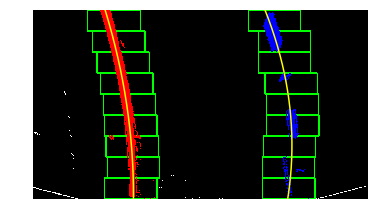

In [97]:
result = fit_polynomial(bin_image)

1 0
(1280,)
1 0
(1280,)
1 0
(1280,)
1 0
(1280,)
1 0
(1280,)
1 0
(1280,)


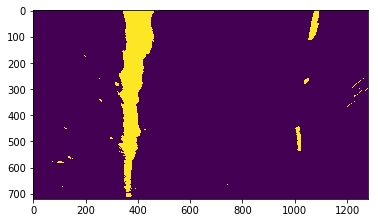

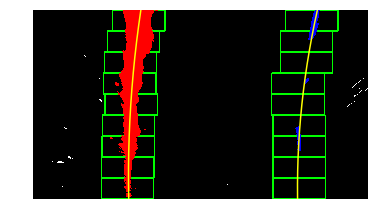

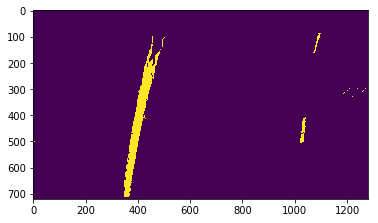

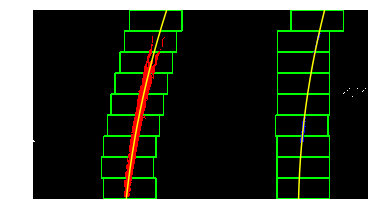

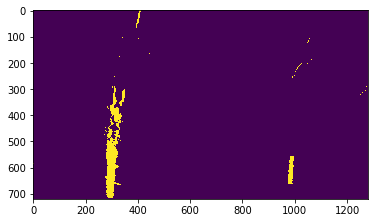

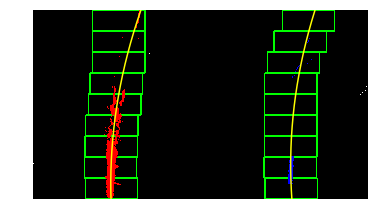

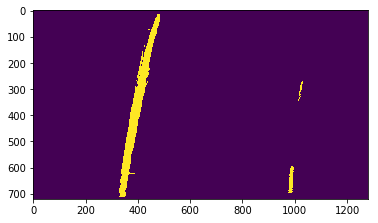

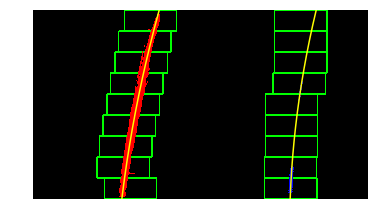

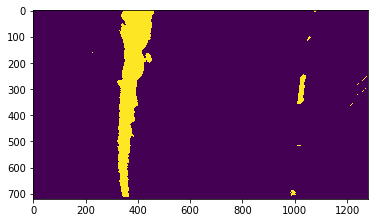

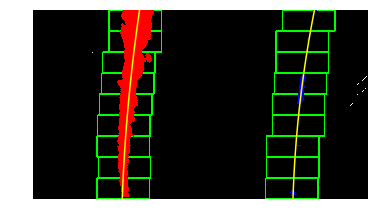

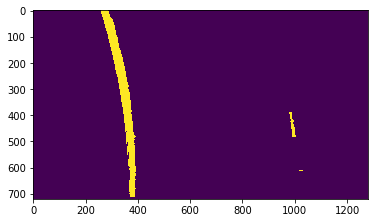

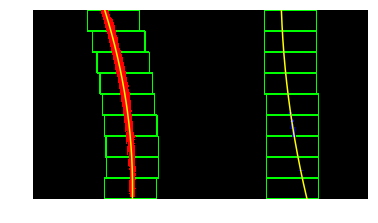

In [99]:
test_images = glob.glob('../test_images/test*.jpg')
for idx, fname in enumerate(test_images):
    test_img = cv2.imread(fname)
    undistorted = cal_undistort(test_img, objpoints, imgpoints)
    warped, M = birds_eye_view(undistorted, source, destination)
#     plt.figure(idx, figsize=(10,10))
#     plt.subplot(141)
#     plt.imshow(warped)
#     plt.title("Original, Undistorted, Warped")
#     plt.axis('off')
    blur_image = gaussian_blur(warped, 5)
    gray_image = cv2.cvtColor(blur_image, cv2.COLOR_RGB2GRAY)
    gradx = abs_sobel_thresh(gray_image, orient='x', sobel_kernel=15, thresh=(20, 100))
#     plt.subplot(142)
#     plt.imshow(gradx, cmap='gray')
#     plt.title("Gradient x")
#     plt.axis('off')
    hsv = cv2.cvtColor(warped,cv2.COLOR_RGB2HSV)
    hls = cv2.cvtColor(warped,cv2.COLOR_RGB2HLS)
    v_thresh=(170, 255)
    s_thresh=(90, 255)
    s_channel = hls[:,:,2]
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= s_thresh[0]) & (s_channel <= s_thresh[1])] = 1
#     plt.subplot(143)
#     plt.imshow(s_binary, cmap='gray')
#     plt.title("s in hls")
#     plt.axis('off')
    v_channel = hsv[:,:,2]
    v_binary = np.zeros_like(v_channel)
    v_binary[(v_channel >= v_thresh[0]) & (v_channel <= v_thresh[1])] = 1
    clr_binary = np.dstack((v_binary, v_binary, v_binary)) * 255
#     plt.subplot(144)
#     plt.imshow(v_binary, cmap='gray')
#     plt.title("v in hsv")
#     plt.axis('off')
    com_binary1 = np.zeros_like(v_channel)
    com_binary2 = np.zeros_like(v_channel)
    com_binary1[(gradx == 1)&(s_binary == 1)] = 1
    com_binary2[(s_binary == 1)&(v_binary == 1)] = 1
    
    combined = np.zeros_like(v_channel)
    combined[(com_binary1 == 1) | (com_binary2 == 1)] = 1
    
#     plt.figure(idx+10)
#     plt.subplot(131)
#     plt.imshow(com_binary1, cmap='gray')
#     plt.axis('off')
#     plt.subplot(132)
#     plt.imshow(com_binary2, cmap='gray')
#     plt.axis('off')
#     plt.subplot(133)
#     plt.imshow(combined, cmap='gray')
#     plt.figure(idx+20)
#     #print(bin_image.shape)
#     histogram = np.sum(combined[combined.shape[0]//2:,:], axis=0)#Bottom half
#     plt.plot(histogram)
#     np.max(bin_image)
    plt.figure()
    plt.imshow(combined)
    result = fit_polynomial(combined)